# Simulation of a control system

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defining a ControllSystem class

In [5]:
class ControlSystem:
    def __init__(
        self,
        initial_temperature=15,
        target_temperature=25,
        ambient_temperature=-5,
        Kc=0.5,
        Ti=1,
        time_constant=2,
        time_step=2,
    ):
        self.current_temperature = initial_temperature  # Initial temperature
        self.target_temperature = target_temperature  # Target temperature
        self.heater_power = 5  # Initial value of heater power
        self.Kc = Kc  # Proportional gain
        self.Ti = Ti  # Integral time constant
        self.time_constant = time_constant  # Time constant
        self.integral = 0  # Initial value of integral
        self.time_step = time_step  # Time step
        self.ambient_temperature = ambient_temperature  # Ambient temperature

    def set_target_temperature(self, target_temp):
        """
        Sets target temperature
        :param target_temp: Target temperature
        :return:
        """
        self.target_temperature = target_temp

    def set_heater_power(self, power):
        """
        Sets manual heater power
        :param power: Power (W)
        :return:
        """
        self.heater_power = power

    def simulate(self, duration):
        """
        Simulate dynamic system with PI controller
        :param duration: Duration on simulation (number of timesteps)
        :return: simulated temperature vector and heater vector
        """
        time = 0
        temperature_history = [self.current_temperature]
        heater_power_history = [self.heater_power]
        while time < duration:
            error = self.target_temperature - self.current_temperature
            # PI controller calculations
            self.integral += error * self.time_step
            P = self.Kc * error
            I = self.Kc / self.Ti * self.integral
            # Heater power inpuat
            # heater_power = P + I
            heater_power = self.heater_power + P + I
            # Room temperature dynamics
            delta_temperature = (
                heater_power
                - (self.current_temperature - self.ambient_temperature)
                / self.time_constant
            ) * self.time_step
            self.current_temperature += delta_temperature
            temperature_history.append(self.current_temperature)
            heater_power_history.append(heater_power)
            time += self.time_step
        return temperature_history, heater_power_history


Defining the main function

In [3]:
def main():
    time_step = 0.1  # Time step for simulation
    simulation_duration = 30  # Duration of simulation
    heater_power_data = []
    # control_system = ControlSystem(initial_temp)
    control_system = ControlSystem(time_step=time_step)
    time_points = [
        i * time_step for i in range(int(simulation_duration / time_step) + 1)
    ]
    while True:
        print("\nCurrent Temperature:", control_system.current_temperature)
        print("1. Set Target Temperature")
        print("2. Set Initial heater Power")
        print("3. Simulate")
        print("4. Plot and Exit")
        choice = input("Enter your choice: ")
        if choice == "1":
            target_temp = float(input("Enter target temperature: "))
            control_system.set_target_temperature(target_temp)
        elif choice == "2":
            heater_power = float(input("Enter initial heater power (Watts): "))
            control_system.set_heater_power(heater_power)
        elif choice == "3":
            temperature_history, heater_power_history = control_system.simulate(
                simulation_duration
            )
            temperature_data = temperature_history  # Store the temperature data
            temperature_setpoint = control_system.target_temperature * np.ones(
                len(temperature_data)
            )
            heater_power_data = heater_power_history
            time_points = [i * time_step for i in range(len(temperature_history))]
            print("Simulation completed. Temperature history:")
            for i, temp in enumerate(temperature_history):
                print(f"Time: {i * time_step:.2f}s, Temperature: {temp:.2f}°C")
        elif choice == "4":
            if not temperature_data:
                print("No simulation data available. Please run a simulation first.")
            else:
                # Create a subplot to show temperature and heater power
                plt.figure(figsize=(10, 6))
                # Plot temperature
                plt.subplot(2, 1, 1)
                plt.plot(
                    time_points,
                    temperature_setpoint,
                    "k",
                    label="Target temperature (°C)",
                    lw=3,
                )
                plt.plot(
                    time_points,
                    temperature_data,
                    "g",
                    label="Measured temperature (°C)",
                )
                plt.xlabel("Time (s)")
                plt.ylabel("Temperature (°C)")
                plt.title("Temperature vs. Time")
                plt.grid(True)
                plt.legend()
                # Plot heater power
                plt.subplot(2, 1, 2)
                plt.plot(time_points, heater_power_data, label="Heater Power (Watts)")
                plt.xlabel("Time (s)")
                plt.ylabel("Heater Power (Watts)")
                plt.title("Heater Power vs. Time")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()  # To ensure subplots don't overlap
                plt.show()
            break
        else:
            print("Invalid choice. Please try again.")

Running the program


Current Temperature: 15
1. Set Target Temperature
2. Set Initial heater Power
3. Simulate
4. Plot and Exit

Current Temperature: 15
1. Set Target Temperature
2. Set Initial heater Power
3. Simulate
4. Plot and Exit

Current Temperature: 15
1. Set Target Temperature
2. Set Initial heater Power
3. Simulate
4. Plot and Exit
Simulation completed. Temperature history:
Time: 0.00s, Temperature: 15.00°C
Time: 0.10s, Temperature: 15.55°C
Time: 0.20s, Temperature: 16.09°C
Time: 0.30s, Temperature: 16.62°C
Time: 0.40s, Temperature: 17.15°C
Time: 0.50s, Temperature: 17.65°C
Time: 0.60s, Temperature: 18.15°C
Time: 0.70s, Temperature: 18.63°C
Time: 0.80s, Temperature: 19.09°C
Time: 0.90s, Temperature: 19.54°C
Time: 1.00s, Temperature: 19.97°C
Time: 1.10s, Temperature: 20.38°C
Time: 1.20s, Temperature: 20.77°C
Time: 1.30s, Temperature: 21.15°C
Time: 1.40s, Temperature: 21.50°C
Time: 1.50s, Temperature: 21.84°C
Time: 1.60s, Temperature: 22.16°C
Time: 1.70s, Temperature: 22.46°C
Time: 1.80s, Temperat

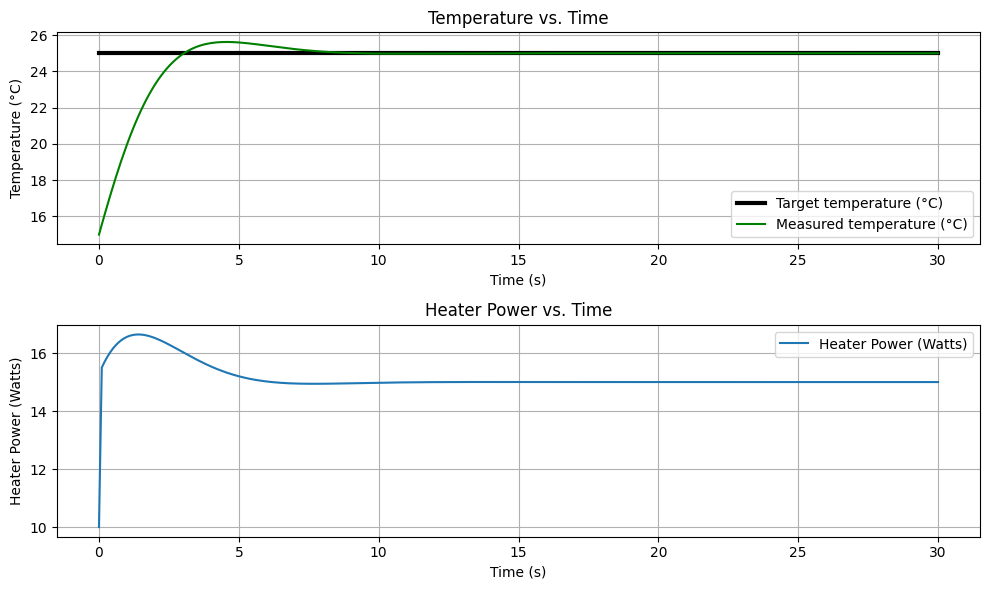

In [4]:

if __name__ == "__main__":
    main()